Crie um jupyter notebook, que irá carregar o dataset: Dataset_de_Transporte.csv e em seguida, responda às seguintes questões:

Qual a média de idade das pessoas em cada cidade?

Qual o meio de transporte mais utilizado em cada cidade?

Existe alguma correlação entre idade e meio de transporte utilizado?

Qual a distribuição etária das pessoas em cada meio de transporte?

Qual cidade apresenta a maior diversidade de meios de transporte utilizados?
Gráficos:

– Qual a distribuição etária das pessoas que usam cada meio de transporte?

– Como varia a média de idade entre as cidades?

– Qual meio de transporte é mais popular em cada cidade?

– Quantos meios de transporte diferentes são usados em cada cidade?

– Existe variação significativa de idade entre os diferentes meios de transporte?

In [87]:
import pandas as pd

In [88]:
dados = pd.read_csv("/content/Dataset_de_Transporte.csv", sep=",")

In [89]:
dados

,Idade,Cidade,Meio de Transporte
0,66,Belo Horizonte,A Pé
1,68,São Paulo,A Pé
2,26,Belo Horizonte,Metrô
3,31,Belo Horizonte,Bicicleta
4,40,Porto Alegre,A Pé
...,...,...,...
95,35,Belo Horizonte,A Pé
96,68,São Paulo,Ônibus
97,20,Curitiba,Carro
98,59,Porto Alegre,Carro


Qual a média de idade das pessoas em cada cidade?

In [90]:
mediaIdadeCidade = dados.groupby('Cidade')['Idade'].mean()

Qual o meio de transporte mais utilizado em cada cidade?

In [61]:
transporteMaisUtilizado = dados.groupby("Cidade")["Meio de Transporte"].agg(lambda x: x.value_counts().idxmax())

In [62]:
transporteMaisUtilizado

,Meio de Transporte
Cidade,
Belo Horizonte,Bicicleta
Curitiba,Ônibus
Porto Alegre,Metrô
Rio de Janeiro,Carro
São Paulo,A Pé


3. Existe alguma correlação entre idade e meio de transporte utilizado?

In [63]:
correlacaoTransporteIdade = dados.groupby("Meio de Transporte")["Idade"].mean()

In [64]:
correlacaoTransporteIdade

,Idade
Meio de Transporte,
A Pé,47.347826
Bicicleta,41.809524
Carro,47.550000
Metrô,44.285714
Ônibus,49.066667


4. Qual a distribuição etária das pessoas em cada meio de transporte?

In [67]:
distribuicaoEtariaTransporte = dados.groupby("Meio de Transporte")["Idade"].describe()

In [68]:
distribuicaoEtariaTransporte

,count,mean,std,min,25%,50%,75%,max
Meio de Transporte,,,,,,,,
A Pé,23.0,47.347826,17.574798,19.0,33.50,50.0,63.5,70.0
Bicicleta,21.0,41.809524,14.558912,19.0,31.00,47.0,51.0,68.0
Carro,20.0,47.550000,15.343351,20.0,37.75,49.0,63.0,66.0
Metrô,21.0,44.285714,15.903279,18.0,31.00,48.0,56.0,70.0
Ônibus,15.0,49.066667,15.517118,25.0,36.00,51.0,61.5,69.0


Qual cidade apresenta a maior diversidade de meios de transporte utilizados? Gráficos:

In [69]:
diversidadeTransporteCidade = dados.groupby("Cidade")["Meio de Transporte"].nunique()

In [70]:
diversidadeTransporteCidade

,Meio de Transporte
Cidade,
Belo Horizonte,5
Curitiba,5
Porto Alegre,5
Rio de Janeiro,5
São Paulo,5


In [71]:
dados['Meio de Transporte'].unique()

array(['A Pé', 'Metrô', 'Bicicleta', 'Carro', 'Ônibus'], dtype=object)

GRÁFICOS


1. - Qual a distribuição etária das pessoas que usam cada meio de transporte?

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
for dados in dados["Meio de Transporte"].unique():
  plt.hist(dados[dados["Meio de Transporte"]==dados]["Idade"],alpha=0.6,bins=10,label = dados)

plt.xlabel("Idade")
plt.title("Número de pessoas")
plt.title("Distribuição da idade por Meio de Transporte")
plt.legend()
plt.show()


TypeError: string indices must be integers, not 'str'

<Figure size 1000x500 with 0 Axes>

3. Como varia a média de idade entre as cidades?

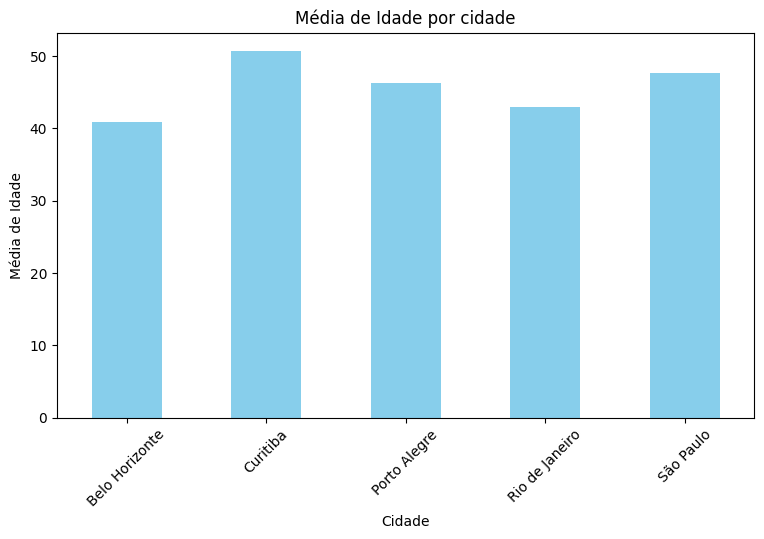

In [91]:
plt.figure(figsize=(9,5))
mediaIdadeCidade.plot(kind="bar",x="Cidade",y="Média de Idade",legend=False,color="skyblue")
plt.ylabel("Média de Idade")
plt.title("Média de Idade por cidade")
plt.xticks(rotation=45)
plt.show()

3.  Qual meio de transporte é mais popular em cada cidade?


In [ ]:
transporteContagem = dados.groupby(["Cidade","Meio de Transporte"]).size()